# 2A - Web-Scraping

Sous ce nom se cache une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n'existant pas forcément sous la forme d'un tableau *Excel*... Bref, il s'agit de récupérer des informations depuis *Internet*.

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d'extraction du contenu des sites internet. Via un programme informatique : nous allons aujourd'hui vous présenter comme créer et exécuter ces robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.

## Un détour par le Web : comment fonctionne un site ?

Même si nous n'allons pas aujourd'hui faire un cours de web, il vous faut néanmoins certaines bases pour comprendre comment un site internet fonctionne et comment sont structurées les informations sur une page.




Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d'une page *Web*.

Pour voir cela, ouvrez n'importe quelle page web et faites un clic-droit dessus. 
- Sous Chrome : Cliquez ensuite sur "Affichez le code source de la page" (Ctrl+U)
- Sous Edge : "Affichez la page source" (Ctrl+U)
- Sous Firefox : "Code source de la page"
- Sous Safari : voir comment faire ici https://fr.wikihow.com/voir-le-code-source


###  HTML 

### Les balises


Sur une page web, vous trouverez toujours à coup sûr des éléments comme ``<head>``, ``<title>``, etc. Il  s'agit des codes qui vous permettent de structurer le contenu d'une page *HTML* et qui s'appellent des balises. 
Citons, par exemple, les balises ``<p>``, ``<h1>``, ``<h2>``, ``<h3>``, ``<strong>`` ou ``<em>``.
Le symbole ``< >`` est une balise : il sert à indiquer le début d'une partie. Le symbole ``</ >`` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple ``<p>`` et ``</p>``).

#### Exemple : les balise des tableaux

$$
\begin{array}{rr} \hline
Balise  & \text{Description} \\ \hline
< table> & \text{Tableau} \\
< caption>& \text{Titre du tableau} \\
< tr> & \text{Ligne de tableau} \\
< th> & \text{Cellule d'en-tête}\\
< td> & \text{Cellule} \\
< thead> & \text{Section de l'en-tête du tableau} \\
< tbody> & \text{Section du corps du tableau} \\
< tfoot> & \text{Section du pied du tableau} \\
\end{array}
$$

##### Application : un tableau en HTML

Le code *HTML* du tableau suivant

Donnera dans le navigateur

<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>

#### Parent et enfant

Dans le cadre du langage HTML, les termes de parents (parent) et enfants (child) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :

Sur la page web, cela apparaitra de la manière suivante : 

<div> 
    <p>
       bla,bla
    </p>
</div>

On dira que l'élément ``<div>`` est le parent de l'élément ``<p>`` tandis que l'élément ``<p>`` est l'enfant de l'élément ``<div>``.

----------

Mais pourquoi apprendre ça pour scraper me direz-vous ?

Pour bien récupérer les informations d'un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions python qui servent au scrapping sont principalement construites pour vous permettre de naviguer entre les balises.

## Scrapper avec python

Nous allons essentiellement utiliser le package [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) pour ce cours, mais d'autres packages existent ([Selenium](https://selenium-python.readthedocs.io/), [Scrapy](https://scrapy.org/)...).

[BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) sera suffisant quand vous voudrez travailler sur des pages HTML statiques, dès que les informations que vous recherchez sont générées via l'exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme Selenium.

De même, si vous ne connaissez pas l'URL, il faudra passer par un framework comme [Scrapy](https://scrapy.org/), qui passe facilement d'une page à une autre ("crawl"). Scrapy est plus complexe à manipuler que [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) : si vous voulez plus de détails, rendez-vous sur la page du tutorial [Scrapy Tutorial](https://doc.scrapy.org/en/latest/intro/tutorial.html).

### Utiliser BeautifulSoup

Les packages pour scrapper des pages HTML : 
- [BeautifulSoup4](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) (``pip install bs4``)
- [urllib](https://docs.python.org/3/library/urllib.html#module-urllib)

In [1]:
import urllib
import bs4
import pandas
#help(bs4)

#### 1ere page HTML

On va commencer facilement, prenons une page wikipedia, par exemple celle de la Ligue 1 de football : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.

In [2]:
# Etape 1 : se connecter à la page wikipedia et obtenir le code source

url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
    
from urllib import request

request_text = request.urlopen(url_ligue_1).read()
print(request_text[:1000])    

b'<!DOCTYPE html>\n<html class="client-nojs" lang="fr" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>Championnat de France de football 2019-2020 \xe2\x80\x94 Wikip\xc3\xa9dia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":[",\\t.","\xc2\xa0\\t,"],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","janvier","f\xc3\xa9vrier","mars","avril","mai","juin","juillet","ao\xc3\xbbt","septembre","octobre","novembre","d\xc3\xa9cembre"],"wgRequestId":"743e60f6-9711-43f4-b93c-93f63e3f14bf","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Championnat_de_France_de_football_2019-2020","wgTitle":"Championnat de France de football 2019-2020","wgCurRevisionId":174078083,"wgRevisionId":174078083,"wgArticleId":12518858,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Page utilisant u

In [3]:
type(request_text)

bytes

In [4]:
# Etape 2 : utiliser le package BeautifulSoup
# qui "comprend" les balises contenues dans la chaine de caractères renvoyée par la fonction request

page = bs4.BeautifulSoup(request_text, "lxml")

#print(page)

Si on print l'objet, page créée avec BeautifulSoup, on voit que ce n'est plus une chaine de caractères mais bien une page HTML avec des balises. On peut à présenter chercher des élements à l'intérieur de ces balises.


par exemple, si on veut connaire le titre de la page, on utilise la méthode .find et on lui demande "title"

In [5]:
print(page.find("title"))

<title>Championnat de France de football 2019-2020 — Wikipédia</title>


La methode ``.find`` ne renvoie que la première occurence de l'élément. 
Cela correspond à l'encart "Généralités" de la page. 

Pour vous en assurer vous pouvez :
- copier le bout de code source obtenu, 
- le coller  dans une cellule de votre notebook
- et passer la cellule en "Markdown"

In [6]:
print(page.find("table"))

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg

La cellule avec le copier-coller du code source donne : 

<table><caption style="background:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="noviewer thumbborder" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Date</th>
<td>
Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Participants</th>
<td>
20 équipes</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Matchs joués</th>
<td>
279</td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Site web officiel</th>
<td>
<a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a></td>
</tr></tbody></table>

---------------
Pour trouver toutes les occurences, on utilise ``.findAll()``.

In [7]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

Il y a 33 éléments dans la page qui sont des <table>


### Exercice guidé : obtenir la liste des équipes de Ligue 1

Dans le premier paragraphe de la page "Participants", on a le tableau avec les résultats de l'année. 

Le but est de récupérer les informations contenues dans ce tableau. 


#### 1) Trouver le tableau

In [8]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find('table', {'class' : 'wikitable sortable'})
print(tableau_participants)

<table class="wikitable sortable" style="font-size:90%;line-height:15px;text-align:center">
<tbody><tr>
<th scope="col">Club
</th>
<th scope="col">Dernière<br/>montée
</th>
<th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>
<th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>
<th scope="col">Entraîneur
</th>
<th scope="col">Depuis
</th>
<th scope="col">Stade
</th>
<th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>
<th scope="col">Nombre<br/>de saisons<br/>en L1
</th></tr>
<tr bgcolor="#97DEFF">
<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Footbal

#### 2) Récupérer chaque ligne du table

In [9]:
table_body = tableau_participants.find('tbody')

# on recherche toutes les lignes du tableau avec la balise "tr"
rows = table_body.find_all('tr')

# on obtient une liste où chaque élément est une des lignes du tableau

# par exemple la première ligne va correspondre aux entêtes de colonne
print(rows[0])

<tr>
<th scope="col">Club
</th>
<th scope="col">Dernière<br/>montée
</th>
<th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>
<th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>
<th scope="col">Entraîneur
</th>
<th scope="col">Depuis
</th>
<th scope="col">Stade
</th>
<th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>
<th scope="col">Nombre<br/>de saisons<br/>en L1
</th></tr>


In [10]:
# par exemple la seconde ligne va correspondre à la ligne du premier club présent dans le tableau

print(rows[1])

<tr bgcolor="#97DEFF">
<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
<td>1974
</td>
<td>637
</td>
<td><span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="Drapeau : Allemagne" class="noviewer thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>
</td>
<td>2018
</td>
<td><a href="/w

#### 3)  Nettoyer les sorties en ne gardant que le texte sur une ligne

On va utiliser l'attribut "text" afin de se débarasser de toute la couche de HTML qu'on obtient à l'étape 2.

Un exemple sur la ligne du premier club :
- on commence par prendre toutes les cellules de cette ligne, avec la balise "td".
- on fait ensuite une boucle sur chacune des cellules et on ne garde que le texte de la cellule avec l'attribut "text".
- enfin, on applique la méthode strip() pour que le texte soit bien mis en forme (sans espace inutile etc).

In [11]:
cols = rows[1].find_all('td')
for ele in cols : 
    print(ele.text.strip())

Paris Saint-Germain
1974
637
1er
Thomas Tuchel
2018
Parc des Princes
47 929
46


#### 4) Généraliser sur toutes les lignes

In [12]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    print(cols)

[]
['Paris Saint-Germain', '1974', '637', '1er', 'Thomas Tuchel', '2018', 'Parc des Princes', '47\xa0929', '46']
['LOSC Lille', '2000', '120', '2e', 'Christophe Galtier', '2017', 'Stade Pierre-Mauroy', '49\xa0712', '59']
['Olympique lyonnais', '1989', '310', '3e', 'Rudi Garcia', '2019', 'Groupama Stadium', '57\xa0206', '60']
['AS Saint-Étienne', '2004', '100', '4e', 'Claude Puel', '2019', 'Stade Geoffroy-Guichard', '41\xa0965', '66']
['Olympique de Marseille', '1996', '110', '5e', 'André Villas-Boas', '2019', 'Orange Vélodrome', '66\xa0226', '69']
['Montpellier HSC', '2009', '40', '6e', 'Michel Der Zakarian', '2017', 'Stade de la Mosson', '22\xa0000', '27']
['OGC Nice', '2002', '50', '7e', 'Patrick Vieira', '2018', 'Allianz Riviera', '35\xa0596', '60']
['Stade de Reims', '2018', '45', '8e', 'David Guion', '2017', 'Stade Auguste-Delaune', '20\xa0546', '35']
['Nîmes Olympique', '2018', '27', '9e', 'Bernard Blaquart', '2015', 'Stade des Costières', '15\xa0788', '35']
['Stade rennais FC', 

On a bien réussi à avoir les informations contenues dans le tableau des Participants du championnat.
Mais la premiere ligne est étrange : une liste vide ... 

Il s'agit des entêtes : qui sont reconnues par la balise "th" et non "td". 

On va mettre tout le contenu dans un dictionnaire, pour le transformer ensuite en dataframe pandas

In [13]:
dico_participants = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_participants[cols[0]] = cols[1:]
dico_participants

{'Paris Saint-Germain': ['1974',
  '637',
  '1er',
  'Thomas Tuchel',
  '2018',
  'Parc des Princes',
  '47\xa0929',
  '46'],
 'LOSC Lille': ['2000',
  '120',
  '2e',
  'Christophe Galtier',
  '2017',
  'Stade Pierre-Mauroy',
  '49\xa0712',
  '59'],
 'Olympique lyonnais': ['1989',
  '310',
  '3e',
  'Rudi Garcia',
  '2019',
  'Groupama Stadium',
  '57\xa0206',
  '60'],
 'AS Saint-Étienne': ['2004',
  '100',
  '4e',
  'Claude Puel',
  '2019',
  'Stade Geoffroy-Guichard',
  '41\xa0965',
  '66'],
 'Olympique de Marseille': ['1996',
  '110',
  '5e',
  'André Villas-Boas',
  '2019',
  'Orange Vélodrome',
  '66\xa0226',
  '69'],
 'Montpellier HSC': ['2009',
  '40',
  '6e',
  'Michel Der Zakarian',
  '2017',
  'Stade de la Mosson',
  '22\xa0000',
  '27'],
 'OGC Nice': ['2002',
  '50',
  '7e',
  'Patrick Vieira',
  '2018',
  'Allianz Riviera',
  '35\xa0596',
  '60'],
 'Stade de Reims': ['2018',
  '45',
  '8e',
  'David Guion',
  '2017',
  'Stade Auguste-Delaune',
  '20\xa0546',
  '35'],
 'Nîme

In [14]:
data_participants = pandas.DataFrame.from_dict(dico_participants,orient='index')
data_participants.head()

,0,1,2,3,4,5,6,7
Paris Saint-Germain,1974,637,1er,Thomas Tuchel,2018,Parc des Princes,47 929,46
LOSC Lille,2000,120,2e,Christophe Galtier,2017,Stade Pierre-Mauroy,49 712,59
Olympique lyonnais,1989,310,3e,Rudi Garcia,2019,Groupama Stadium,57 206,60
AS Saint-Étienne,2004,100,4e,Claude Puel,2019,Stade Geoffroy-Guichard,41 965,66
Olympique de Marseille,1996,110,5e,André Villas-Boas,2019,Orange Vélodrome,66 226,69


#### 5) Récupérer les entêtes du tableau

In [15]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_participants = cols

[<th scope="col">Club
</th>, <th scope="col">Dernière<br/>montée
</th>, <th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>, <th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>, <th scope="col">Entraîneur
</th>, <th scope="col">Depuis
</th>, <th scope="col">Stade
</th>, <th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>, <th scope="col">Nombre<br/>de saisons<br/>en L1
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]


In [16]:
columns_participants

['Club',
 'Dernière Montée',
 'Budget [ 3 ] En M €',
 'Classement 2018-2019',
 'Entraîneur',
 'Depuis',
 'Stade',
 'Capacité En L1 [ 4 ]',
 'Nombre De Saisons En L1']

In [17]:
import re
    
columns_participants = [re.sub('\[ (\d+) \] ?', '', nom_col) for nom_col in columns_participants]
columns_participants

['Club',
 'Dernière Montée',
 'Budget En M €',
 'Classement 2018-2019',
 'Entraîneur',
 'Depuis',
 'Stade',
 'Capacité En L1 ',
 'Nombre De Saisons En L1']

#### 6) Finalisation du tableau 

In [18]:
data_participants.columns = columns_participants[1:]

In [19]:
data_participants

,Dernière Montée,Budget En M €,Classement 2018-2019,Entraîneur,Depuis,Stade,Capacité En L1,Nombre De Saisons En L1
Paris Saint-Germain,1974,637,1er,Thomas Tuchel,2018,Parc des Princes,47 929,46
LOSC Lille,2000,120,2e,Christophe Galtier,2017,Stade Pierre-Mauroy,49 712,59
Olympique lyonnais,1989,310,3e,Rudi Garcia,2019,Groupama Stadium,57 206,60
AS Saint-Étienne,2004,100,4e,Claude Puel,2019,Stade Geoffroy-Guichard,41 965,66
Olympique de Marseille,1996,110,5e,André Villas-Boas,2019,Orange Vélodrome,66 226,69
Montpellier HSC,2009,40,6e,Michel Der Zakarian,2017,Stade de la Mosson,22 000,27
OGC Nice,2002,50,7e,Patrick Vieira,2018,Allianz Riviera,35 596,60
Stade de Reims,2018,45,8e,David Guion,2017,Stade Auguste-Delaune,20 546,35
Nîmes Olympique,2018,27,9e,Bernard Blaquart,2015,Stade des Costières,15 788,35
Stade rennais FC,1994,65,10e,Julien Stéphan,2018,Roazhon Park,29 194,62


In [20]:
import urllib
import pandas as pd
import bs4 

division=[]
equipe=[]
stade=[]
latitude_stade=[]        
longitude_stade=[]     


url_list=["http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020", "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020"]

for url_ligue in url_list :
       
    print(url_ligue)
    sock = urllib.request.urlopen(url_ligue).read() 
    page=bs4.BeautifulSoup(sock)

# Rechercher les liens des équipes dans la liste disponible sur wikipedia 

    for team in page.findAll('span' , {'class' : 'toponyme'}) :  
        
        # Indiquer si c'est de la ligue 1 ou de la ligue 2
        
        if url_ligue==url_list[0] :
            division.append("L1")
        else :
            division.append("L2")

       # Trouver le nom et le lien de l'équipe
            
        if team.find('a')!=None :
            team_url=team.find('a').get('href')
            name_team=team.find('a').get('title')
            equipe.append(name_team)
            url_get_info = "http://fr.wikipedia.org"+team_url
            print(url_get_info)
 
       # aller sur la page de l'équipe
           
            search = urllib.request.urlopen(url_get_info).read()
            search_team=bs4.BeautifulSoup(search)

       # trouver le stade             
            compteur = 0
            for stadium in search_team.findAll('tr'):
                for x in stadium.findAll('th' , {'scope' : 'row'} ) :
                    if x.contents[0].string=="Stade" and compteur == 0:
                        compteur = 1
                        # trouver le lien du stade et son nom
                        url_stade=stadium.findAll('a')[1].get('href')
                        name_stadium=stadium.findAll('a')[1].get('title')
                        stade.append(name_stadium)
                        url_get_stade = "http://fr.wikipedia.org"+url_stade
                        print(url_get_stade)
                        
                        # Aller sur la page du stade et trouver ses coodronnées géographiques
                        
                        search_stade = urllib.request.urlopen(url_get_stade).read()
                        soup_stade=bs4.BeautifulSoup(search_stade) 
                        for coordinates in soup_stade.find('a',{'class': "mw-kartographer-maplink"}) :
                            print(coordinates)
                            liste =   coordinates.split(",")             
                            latitude_stade.append(liste[0])
                            longitude_stade.append(liste[1])
                            

dict = {'division' : division , 'equipe': equipe, 'stade': stade, 'latitude': latitude_stade, 'longitude' : longitude_stade}
data = pd.DataFrame(dict)

http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020
http://fr.wikipedia.org/wiki/Paris_Saint-Germain_Football_Club
http://fr.wikipedia.org/wiki/Parc_des_Princes
48° 50′ 29″ N, 2° 15′ 11″ E
http://fr.wikipedia.org/wiki/LOSC_Lille
http://fr.wikipedia.org/wiki/Stade_Pierre-Mauroy
50° 36′ 43″ N, 3° 07′ 50″ E
http://fr.wikipedia.org/wiki/Olympique_lyonnais
http://fr.wikipedia.org/wiki/Parc_Olympique_lyonnais
45° 45′ 55″ N, 4° 58′ 55″ E
http://fr.wikipedia.org/wiki/Association_sportive_de_Saint-%C3%89tienne
http://fr.wikipedia.org/wiki/Stade_Geoffroy-Guichard
45° 27′ 39″ N, 4° 23′ 25″ E
http://fr.wikipedia.org/wiki/Olympique_de_Marseille
http://fr.wikipedia.org/wiki/Orange_V%C3%A9lodrome
43° 16′ 11″ N, 5° 23′ 45″ E
http://fr.wikipedia.org/wiki/Montpellier_H%C3%A9rault_Sport_Club
http://fr.wikipedia.org/wiki/Stade_de_la_Mosson
43° 37′ 19″ N, 3° 48′ 44″ E
http://fr.wikipedia.org/wiki/Stade_de_Reims
http://fr.wikipedia.org/wiki/Stade_Auguste-Delaune
49° 14′ 48″ N, 4° 01′ 30

In [21]:
len(division), len(equipe), len(stade), len(latitude_stade), len(longitude_stade)

(40, 40, 40, 40, 40)

In [22]:
data

,division,equipe,stade,latitude,longitude
0,L1,Paris Saint-Germain Football Club,Parc des Princes,48° 50′ 29″ N,2° 15′ 11″ E
1,L1,LOSC Lille,Stade Pierre-Mauroy,50° 36′ 43″ N,3° 07′ 50″ E
2,L1,Olympique lyonnais,Parc Olympique lyonnais,45° 45′ 55″ N,4° 58′ 55″ E
3,L1,Association sportive de Saint-Étienne,Stade Geoffroy-Guichard,45° 27′ 39″ N,4° 23′ 25″ E
4,L1,Olympique de Marseille,Orange Vélodrome,43° 16′ 11″ N,5° 23′ 45″ E
5,L1,Montpellier Hérault Sport Club,Stade de la Mosson,43° 37′ 19″ N,3° 48′ 44″ E
6,L1,Stade de Reims,Stade Auguste-Delaune,49° 14′ 48″ N,4° 01′ 30″ E
7,L1,Olympique Gymnaste Club Nice,Allianz Riviera,43° 42′ 18″ N,7° 11′ 33″ E
8,L1,Nîmes Olympique,Stade des Costières,43° 48′ 58″ N,4° 21′ 33″ E
9,L1,Racing Club de Strasbourg Alsace,Stade de la Meinau,48° 33′ 36″ N,7° 45′ 18″ E


In [23]:
# -*- coding: utf-8 -*-
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'O':
        dd *= -1
    return dd;

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    lng = dms2dd(parts[4], parts[5], parts[6], parts[7])
    return (lat, lng)

dd = parse_dms("47°57'32' N 0°13'20' E")

print(dd)

(47.95888888888889, 0.22222222222222224)


## Enoncé de l'exercice (version sans guide)

Pour cet exercice, nous vous demandons d'obtenir 

### Etape 1 
les informations personnelles des ``893`` pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final dans un DataFrame  sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple : [Nincada](http://pokemondb.net/pokedex/nincada).

<div class="grid-col span-md-6 span-lg-4">
<h2>Pokédex data</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>National №</th>
<td><strong>290</strong></td>
</tr>
<tr>
<th>Type</th>
<td>
<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a> </td>
</tr>
<tr>
<th>Species</th>
<td>Trainee Pokémon</td>
</tr>
<tr>
<th>Height</th>
<td>0.5&nbsp;m (1′08″)</td>
</tr>
<tr>
<th>Weight</th>
<td>5.5&nbsp;kg (12.1&nbsp;lbs)</td>
</tr>
<tr>
<th>Abilities</th>
<td><span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br></td>
</tr>
<tr>
<th>Local №</th>
<td>042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br></td>
</tr>
</tbody>
</table>
</div>


<div class="grid-col span-md-12 span-lg-4">
<div class="grid-row">
<div class="grid-col span-md-6 span-lg-12">
<h2>Training</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>EV yield</th>
<td class="text">
1 Defense </td>
</tr>
<tr>
<th>Catch rate</th>
<td>255 <small class="text-muted">(33.3% with PokéBall, full HP)</small></td>
</tr>
<tr>
<th>Base <a href="/glossary#def-friendship">Friendship</a></th>
<td>70 <small class="text-muted">(normal)</small></td>
</tr>
<tr>
<th>Base Exp.</th>
<td>53</td>
</tr>
<tr>
<th>Growth Rate</th>
<td>Erratic</td>
</tr>
</tbody>
</table>
</div>
<div class="grid-col span-md-6 span-lg-12">
<h2>Breeding</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>Egg Groups</th>
<td>
<a href="/egg-group/bug">Bug</a> </td>
</tr>
<tr>
<th>Gender</th>
<td><span class="text-blue">50% male</span>, <span class="text-pink">50% female</span></td> </tr>
<tr>
<th><a href="/glossary#def-eggcycle">Egg cycles</a></th>
<td>15 <small class="text-muted">(3,599–3,855 steps)</small>
</td>
</tr>
</tbody>
</table>
</div>
</div>
</div>

<div class="grid-col span-md-12 span-lg-8">
<div id="dex-stats"></div>
<h2>Base stats</h2>
<div class="resp-scroll">
<table class="vitals-table">
<tbody>
<tr>
<th>HP</th>
<td class="cell-num">31</td>
<td class="cell-barchart">
<div style="width:17.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">172</td>
<td class="cell-num">266</td>
</tr>
<tr>
<th>Attack</th>
<td class="cell-num">45</td>
<td class="cell-barchart">
<div style="width:25.00%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">85</td>
<td class="cell-num">207</td>
</tr>
<tr>
<th>Defense</th>
<td class="cell-num">90</td>
<td class="cell-barchart">
<div style="width:50.00%;" class="barchart-bar barchart-rank-4 "></div>
</td>
<td class="cell-num">166</td>
<td class="cell-num">306</td>
</tr>
<tr>
<th>Sp. Atk</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Sp. Def</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Speed</th>
<td class="cell-num">40</td>
<td class="cell-barchart">
<div style="width:22.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">76</td>
<td class="cell-num">196</td>
</tr>
</tbody>
<tfoot>
<tr>
<th>Total</th>
<td class="cell-total"><b>266</b></td>
<th class="cell-barchart"></th>
<th>Min</th>
<th>Max</th>
</tr>
</tfoot>
</table>
</div>
</div>

### Etape 2

Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  

(indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))

_pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

## Enoncé de l'exercice (version guidée)

Pour cet exercice, nous vous demandons d'obtenir 

### Etape 1 
les informations personnelles des ``893`` pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national). Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

- Pokédex data
- Training
- Breeding
- Base stats

Pour exemple : [Nincada](http://pokemondb.net/pokedex/nincada).

<div class="grid-col span-md-6 span-lg-4">
<h2>Pokédex data</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>National №</th>
<td><strong>290</strong></td>
</tr>
<tr>
<th>Type</th>
<td>
<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a> </td>
</tr>
<tr>
<th>Species</th>
<td>Trainee Pokémon</td>
</tr>
<tr>
<th>Height</th>
<td>0.5&nbsp;m (1′08″)</td>
</tr>
<tr>
<th>Weight</th>
<td>5.5&nbsp;kg (12.1&nbsp;lbs)</td>
</tr>
<tr>
<th>Abilities</th>
<td><span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br></td>
</tr>
<tr>
<th>Local №</th>
<td>042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br></td>
</tr>
</tbody>
</table>
</div>


<div class="grid-col span-md-12 span-lg-4">
<div class="grid-row">
<div class="grid-col span-md-6 span-lg-12">
<h2>Training</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>EV yield</th>
<td class="text">
1 Defense </td>
</tr>
<tr>
<th>Catch rate</th>
<td>255 <small class="text-muted">(33.3% with PokéBall, full HP)</small></td>
</tr>
<tr>
<th>Base <a href="/glossary#def-friendship">Friendship</a></th>
<td>70 <small class="text-muted">(normal)</small></td>
</tr>
<tr>
<th>Base Exp.</th>
<td>53</td>
</tr>
<tr>
<th>Growth Rate</th>
<td>Erratic</td>
</tr>
</tbody>
</table>
</div>
<div class="grid-col span-md-6 span-lg-12">
<h2>Breeding</h2>
<table class="vitals-table">
<tbody>
<tr>
<th>Egg Groups</th>
<td>
<a href="/egg-group/bug">Bug</a> </td>
</tr>
<tr>
<th>Gender</th>
<td><span class="text-blue">50% male</span>, <span class="text-pink">50% female</span></td> </tr>
<tr>
<th><a href="/glossary#def-eggcycle">Egg cycles</a></th>
<td>15 <small class="text-muted">(3,599–3,855 steps)</small>
</td>
</tr>
</tbody>
</table>
</div>
</div>
</div>

<div class="grid-col span-md-12 span-lg-8">
<div id="dex-stats"></div>
<h2>Base stats</h2>
<div class="resp-scroll">
<table class="vitals-table">
<tbody>
<tr>
<th>HP</th>
<td class="cell-num">31</td>
<td class="cell-barchart">
<div style="width:17.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">172</td>
<td class="cell-num">266</td>
</tr>
<tr>
<th>Attack</th>
<td class="cell-num">45</td>
<td class="cell-barchart">
<div style="width:25.00%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">85</td>
<td class="cell-num">207</td>
</tr>
<tr>
<th>Defense</th>
<td class="cell-num">90</td>
<td class="cell-barchart">
<div style="width:50.00%;" class="barchart-bar barchart-rank-4 "></div>
</td>
<td class="cell-num">166</td>
<td class="cell-num">306</td>
</tr>
<tr>
<th>Sp. Atk</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Sp. Def</th>
<td class="cell-num">30</td>
<td class="cell-barchart">
<div style="width:16.67%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">58</td>
<td class="cell-num">174</td>
</tr>
<tr>
<th>Speed</th>
<td class="cell-num">40</td>
<td class="cell-barchart">
<div style="width:22.22%;" class="barchart-bar barchart-rank-2 "></div>
</td>
<td class="cell-num">76</td>
<td class="cell-num">196</td>
</tr>
</tbody>
<tfoot>
<tr>
<th>Total</th>
<td class="cell-total"><b>266</b></td>
<th class="cell-barchart"></th>
<th>Min</th>
<th>Max</th>
</tr>
</tfoot>
</table>
</div>
</div>

Pour cela, le code devra être divisé en plusieurs étapes : 

1) trouver la page principale du site et la transformer en un objet intelligible pour votre code :
- urllib.request.Request
- urllib.request.urlopen
- bs4.BeautifulSoup

note : pour ce site, il faudra ajouter un paramètre supplémentaire à la fonction Request 

urllib.request.Request( www.sitequinousintéresse.com ,headers={'User-Agent': 'Mozilla/5.0'})

2) regarder la page de 2-3 pokemons et trouver une structure commune à leur url, en déduire sur quel élément on fera une boucle pour avoir les informations de chaque page

3) obtenir la liste qui nous permettra de faire la boucle par la suite

4) à partir de la page d'un pokemon, obtenir les 4 tableaux qui nous intéressent :
- on va chercher l'élément suivant : ('table', { 'class' : "vitals-table"}
- les stocker dans un dictionnaire

5) écrire une fonction qui généralise cette récupération afin de l'intégrer à notre boucle

6) lancer la boucle sur tous les pokemons déjà trouvés

7) obtenir un DataFrame avec toutes les informations récupérées


### Etape 2

Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier  

(indice : utilisez les modules request et [shutil](https://docs.python.org/3/library/shutil.html))

_pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n'est pas présent dans le TD_.

### Bonus : Aller sur internet avec Selenium

Jusqu'à présent, nous avons raisonné comme si nous connaissions toujours l'url qui nous intéresse. De plus, les pages que nous visitons sont "statiques", elles ne dépendent pas d'une action ou d'une recherche de l'internaute. 

Nous allons voir à présent comment nous en sortir pour remplir des champs sur un site web et récupérer ce qui nous intéresse. 

L'avantage du package [Selenium](https://pypi.python.org/pypi/selenium) est d'obtenir des informations du site qui ne sont pas dans le code html mais qui apparaissent uniquement à la suite de l'exécution de script javascript en arrière plan. 

[Selenium](https://pypi.python.org/pypi/selenium) se comporte comme un utilisateur lambda sur internet : il clique sur des liens, il remplit des formulaires etc. Dans cet exemple, nous allons essayer de aller sur le site de [Bing Actualités](https://www.bing.com/news) et entrer dans la barre de recherche un sujet donné. 

La version de [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/) doit être ``>= 2.36`` et dépend de la version de Chrome que vous avez sur votre poste.

In [24]:
# Si selenium n'est pas installé.
#!pip install selenium

In [25]:
import selenium #pip install selenium
# télécharger le chrome driver https://chromedriver.storage.googleapis.com/index.html?path=85.0.4183.83/
path_to_web_driver = "chromedriver"

On va sur le site de Bing Actualités, et on lui indique le mot clé que nous souhaitons chercher. 

Dans cet exemple, on va voir que l'ordinateur va ouvrir une nouvelle fenetre.

In [26]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
#chrome_options.add_argument('--headless')
#chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--verbose') 

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)

browser.get('https://www.bing.com/news')

# on cherche l'endroit où on peut remplir un formulaire
# en utilisant les outils du navigateur > inspecter les éléments de la page
# on voit que la barre de recherche est un élement du code appelé 'q' comme query
# on lui demande de chercher cet élément

search = browser.find_element_by_name('q')
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("Trump")

search_button = browser.find_element_by_xpath("//input[@id='sb_form_go']")

#search_button = browser.find_element_by_id('search_button_homepage')
 
search_button.click()

# on appuie sur le bouton "Entrée" Return en anglais
#search.send_keys(Keys.RETURN)

<selenium.webdriver.remote.webelement.WebElement (session="8141782075d6874c1a46bf902c87a0b7", element="45dc544d-00e7-4744-ab66-386fffc0d14e")>
['', 'input', '45dc544d-00e7-4744-ab66-386fffc0d14e']


In [27]:
png = browser.get_screenshot_as_png()

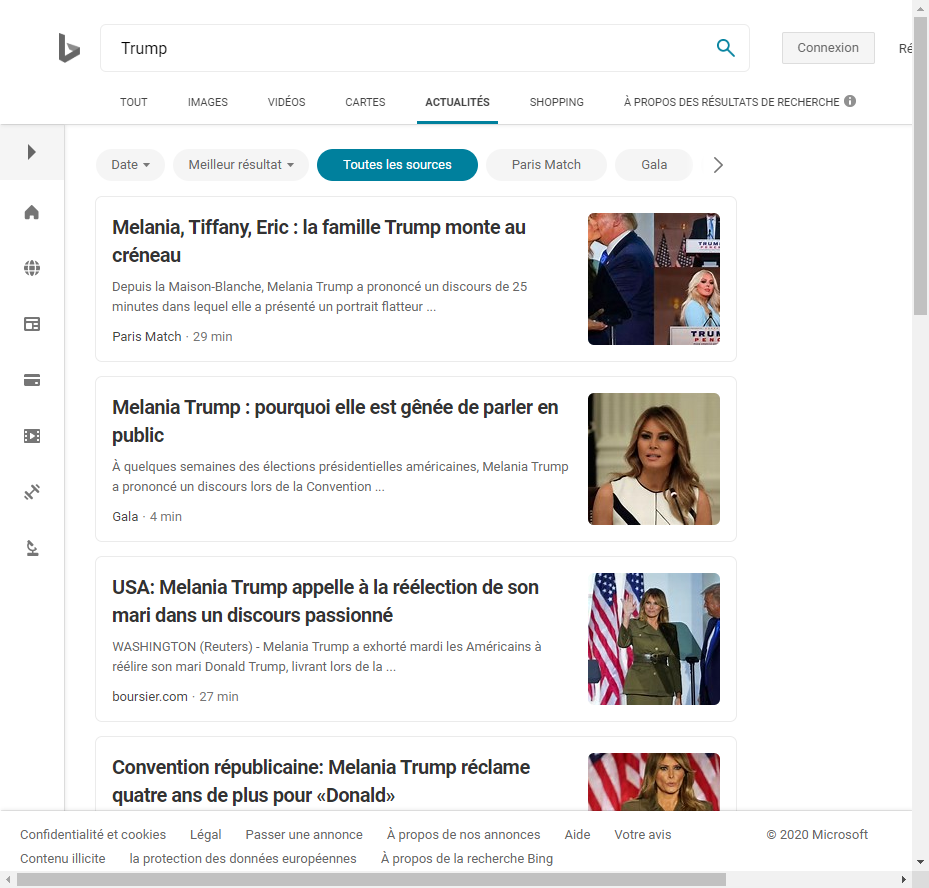

In [28]:
from IPython.display import Image
Image(png, width='500')

On extrait les résultats.

In [29]:
from selenium.common.exceptions import StaleElementReferenceException
links = browser.find_elements_by_xpath("//div/a[@class='title'][@href]")

results = []
for link in links:
    try:
        url = link.get_attribute('href')
    except StaleElementReferenceException as e:
        print("Issue with '{0}' and '{1}'".format(url, link))
        print("It might be due to slow javascript which produces the HTML page.")
    results.append(url)

len(results)

12

In [30]:
# on a une pause de 10 secondes pour aller voir ce qui se passe sur la page internet
# on demande de quitter le navigateur quand tout est fini
browser.quit()

In [31]:
print(results)

['https://www.parismatch.com/Actu/International/Melania-Tiffany-Eric-la-famille-Trump-monte-au-creneau-1700126', 'https://www.gala.fr/l_actu/news_de_stars/melania-trump-pourquoi-elle-est-genee-de-parler-en-public_453787', 'https://www.boursier.com/actualites/reuters/usa-melania-trump-appelle-a-la-reelection-de-son-mari-dans-un-discours-passionne-246606.html', 'https://www.rfi.fr/fr/am%C3%A9riques/20200826-convention-r%C3%A9publicaine-melania-trump-r%C3%A9clame-quatre-ans-plus-donald', 'https://www.capital.fr/economie-politique/donald-trump-et-le-patron-de-la-poste-des-etats-unis-attaques-en-justice-par-new-york-1378739', 'https://fr.euronews.com/2020/08/26/melania-et-eric-trump-a-la-tribune-de-la-convention-du-grand-old-party-une-affaire-de-fami', 'https://www.huffingtonpost.fr/entry/discours-melania-trump-convention-republicaine-faux-semblants_fr_5f45efbec5b697186e2e50b9', 'https://www.lemonde.fr/international/article/2020/08/26/au-deuxieme-jour-de-la-convention-republicaine-la-tres-d

### Utiliser selenium pour jouer à 2048

Dans cet exemple, on utilise le module pour que python appuie lui même sur les touches du clavier afin de jouer à 2048.

Note : ce bout de code ne donne pas une solution à 2048, il permet juste de voir ce qu'on peut faire avec selenium

In [32]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# on ouvre la page internet du jeu 2048

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)
browser.get('https://play2048.co//')

# Ce qu'on va faire : une boucle qui répète inlassablement la même chose : haut / droite / bas / gauche

# on commence par cliquer sur la page pour que les touches sachent 
browser.find_element_by_class_name('grid-container').click()
grid = browser.find_element_by_tag_name('body')

# pour savoir quels coups faire à quel moment, on crée un dictionnaire
direction = {0: Keys.UP, 1: Keys.RIGHT, 2: Keys.DOWN, 3: Keys.LEFT}
count = 0

while True:
    try: # on vérifie que le bouton "Try again" n'est pas là - sinon ça veut dire que le jeu est fini
        retryButton = browser.find_element_by_link_text('Try again')
        scoreElem = browser.find_element_by_class_name('score-container')
        break
    except:
        #Do nothing.  Game is not over yet
        pass
    # on continue le jeu - on appuie sur la touche suivante pour le coup d'après
    count += 1
    grid.send_keys(direction[count % 4]) 
    time.sleep(0.1)

print('Score final : {} en {} coups'.format(scoreElem.text, count))    
browser.quit()

Score final : 3084 en 265 coups
